        # Updated Excel

In [1]:
# import the relevant packages
from scipy.interpolate import *
from scipy import stats
from scipy.stats.mstats import winsorize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Set matplotlib inline
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('Set_A.csv',encoding = "ISO-8859-1",index_col= [0,1])
print(df.head(3))

                                    cusip Ticker  Environment   Social   \
Company                    Year                                           
Agilent Technologies, Inc. 2000  00846U10      A             0        1   
                           2001  00846U10      A             0        1   
                           2002  00846U10      A             0        7   

                                 Governance   SumofESG   New SUMofESG  \
Company                    Year                                         
Agilent Technologies, Inc. 2000           -2          5            -1   
                           2001           -2         -4            -1   
                           2002            0          0             7   

                                      P/B       ROA  Leverage      SG&A  \
Company                    Year                                           
Agilent Technologies, Inc. 2000  3.993307  0.197281  0.375074  0.770022   
                           2001  

In [3]:
df.describe()

,Environment,Social,Governance,SumofESG,New SUMofESG,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue,SIC Dummy
count,25262.000000,25262.000000,25262.000000,25262.00000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000
mean,0.116499,0.275948,-0.334692,-0.02668,0.057755,3.361883,0.082374,0.817012,0.149319,0.249743,0.019265,0.046465,0.177892,0.866566,34.115470
std,0.946244,2.060171,0.784968,2.47678,2.692733,42.779266,0.089468,0.499557,0.183769,2.631197,0.047746,0.079022,0.266501,0.862108,20.845058
min,-5.000000,-9.000000,-5.000000,-12.00000,-12.000000,0.000000,-0.762097,0.000000,-0.042283,-265.494845,0.000000,-0.029157,0.000000,-0.227219,10.000000
25%,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,1.008921,0.020207,0.486426,0.007433,0.084628,0.000000,0.003463,0.007495,0.257756,13.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,1.787980,0.069186,0.651254,0.083990,0.171030,0.000000,0.027363,0.068914,0.665520,34.000000
75%,0.000000,1.000000,0.000000,1.00000,1.000000,2.979255,0.125211,0.966112,0.230884,0.283129,0.015105,0.060195,0.270880,1.182436,49.000000
max,6.000000,15.000000,2.000000,20.00000,20.000000,5603.074227,1.216186,2.869038,1.917843,233.176471,1.792264,5.598592,9.914449,13.490562,99.000000


In [4]:
df.columns = df.columns.str.strip() #removewhitespaces

In [5]:
df_win = df.copy()

In [6]:
df_win["Environment"] = winsorize(df_win["Environment"], (0.01, 0.01))
df_win["Social"] = winsorize(df_win["Social"], (0.01, 0.01))
df_win["Governance"] = winsorize(df_win["Governance"], (0.01, 0.01))
df_win["SumofESG"] = winsorize(df_win["SumofESG"], (0.01, 0.01))
df_win["P/B"] = winsorize(df_win["P/B"], (0.01, 0.01))
df_win["ROA"] = winsorize(df_win["ROA"], (0.01, 0.01))
df_win["Leverage"] = winsorize(df_win["Leverage"], (0.01, 0.01))
df_win["SG&A"] = winsorize(df_win["SG&A"], (0.01, 0.01))
df_win["ROE"] = winsorize(df_win["ROE"], (0.01, 0.01))
df_win["R&D"] = winsorize(df_win["R&D"], (0.01, 0.01))
df_win["CAPEX"] = winsorize(df_win["CAPEX"], (0.01, 0.01))
df_win["Intangible"] = winsorize(df_win["Intangible"], (0.01, 0.01))
df_win["Revenue"] = winsorize(df_win["Revenue"], (0.01, 0.01))

In [7]:
df_win.describe()

,Environment,Social,Governance,SumofESG,New SUMofESG,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue,SIC Dummy
count,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000,25262.000000
mean,0.117607,0.268902,-0.333782,-0.032974,0.057755,2.521612,0.082477,0.816977,0.147582,0.218083,0.018385,0.044439,0.171644,0.855235,34.115470
std,0.915615,1.981750,0.770368,2.371411,2.692733,3.050541,0.081237,0.497580,0.176065,0.267501,0.040559,0.056832,0.218855,0.794958,20.845058
min,-3.000000,-4.000000,-3.000000,-6.000000,-12.000000,0.000000,-0.122516,0.119374,0.000000,-0.405706,0.000000,0.000000,0.000000,0.038857,10.000000
25%,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.008921,0.020207,0.486426,0.007433,0.084628,0.000000,0.003463,0.007495,0.257756,13.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.787980,0.069186,0.651254,0.083990,0.171030,0.000000,0.027363,0.068914,0.665520,34.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,2.979255,0.125211,0.966112,0.230884,0.283129,0.015105,0.060195,0.270880,1.182436,49.000000
max,4.000000,7.000000,1.000000,8.000000,20.000000,20.814432,0.352390,1.881904,0.768778,1.784969,0.212959,0.321436,0.984274,4.056562,99.000000


In [8]:
df_win.tail()

cusip Ticker  Environment  Social  Governance  \
Company           Year                                                     
Zoran Corporation 2010  98975F10   ZRAN            0      -2           0   
ZOETIS INC.       2013  98978V10    ZTS            0      -1           0   
                  2014  98978V10    ZTS            1       1           1   
                  2015  98978V10    ZTS            2       0           1   
                  2016  98978V10    ZTS            1       1           0   

                        SumofESG  New SUMofESG        P/B       ROA  Leverage  \
Company           Year                                                          
Zoran Corporation 2010         0            -2   1.073308 -0.057724  0.208737   
ZOETIS INC.       2013        -4            -1  16.990644  0.180613  0.853309   
                  2014        -3             3  16.134737  0.177493  0.797639   
                  2015        -3             3  20.814432  0.195702  0.862126   
                  2016         2             2  17.600086  0.187539  0.804027   

                            SG&A       ROE       R&D     CAPEX  Intangible  \
Company           Year                                                       
Zoran Corporation 2010  0.393153 -0.079432  0.209423  0.011938    0.097429   
ZOETIS INC.       2013  0.289843  1.175676  0.063718  0.029384    0.285053   
                  2014  0.290942  0.870606  0.061299  0.027447    0.259683   
                  2015  0.266535  1.185151  0.055396  0.033903    0.400333   
                  2016  0.215215  0.989993  0.047517  0.027297    0.342348   

                         Revenue  SIC Dummy  
Company           Year                       
Zoran Corporation 2010  0.646824         36  
ZOETIS INC.       2013  0.732034         28  
                  2014  0.734523         28  
                  2015  0.724837         28  
                  2016  0.621509         28

In [9]:
df_win["newSumofESG"] = df_win["Environment"] + df_win["Social"] + df_win["Governance"]
df_win.drop(columns=["SumofESG","New SUMofESG"])
df_win.head()

cusip Ticker  Environment  Social  \
Company                    Year                                         
Agilent Technologies, Inc. 2000  00846U10      A            0       1   
                           2001  00846U10      A            0       1   
                           2002  00846U10      A            0       7   
                           2003  00846U10      A            0       2   
                           2004  00846U10      A            0       3   

                                 Governance  SumofESG  New SUMofESG       P/B  \
Company                    Year                                                 
Agilent Technologies, Inc. 2000          -2         5            -1  3.993307   
                           2001          -2        -4            -1  1.814184   
                           2002           0         0             7  1.387778   
                           2003          -1        -2             1  4.200397   
                           2004          -1        -1             2  3.392889   

                                      ROA  Leverage      SG&A       ROE  \
Company                    Year                                           
Agilent Technologies, Inc. 2000  0.197281  0.375074  0.768778  0.203989   
                           2001 -0.065282  0.291385  0.458042 -0.097190   
                           2002 -0.122516  0.435938  0.458177 -0.244867   
                           2003 -0.043033  0.551532  0.336218 -0.125000   
                           2004  0.090043  0.490221  0.417659  0.157631   

                                      R&D     CAPEX  Intangible   Revenue  \
Company                    Year                                             
Agilent Technologies, Inc. 2000  0.212959  0.151359    0.102314  1.978876   
                           2001  0.160119  0.104570    0.127003  0.996558   
                           2002  0.146381  0.037691    0.085775  0.752567   
                           2003  0.128124  0.024991    0.049006  0.738266   
                           2004  0.145625  0.018739    0.070351  1.140384   

                                 SIC Dummy  newSumofESG  
Company                    Year                          
Agilent Technologies, Inc. 2000         38           -1  
                           2001         38           -1  
                           2002         38            7  
                           2003         38            1  
                           2004         38            2

In [10]:
from linearmodels import PooledOLS
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm

In [11]:
df_win['P/B'].dropna()
df_win['SumofESG'].dropna()

Company                     Year
Agilent Technologies, Inc.  2000    5
                            2001   -4
                            2002    0
                            2003   -2
                            2004   -1
                                   ..
Zoran Corporation           2010    0
ZOETIS INC.                 2013   -4
                            2014   -3
                            2015   -3
                            2016    2
Name: SumofESG, Length: 25262, dtype: int64

In [12]:
exog_vars = ['Environment','Social','Governance','Revenue','SG&A','ROA','ROE','R&D','CAPEX','Leverage','Intangible','SIC Dummy']
exog = sm.add_constant(df_win[exog_vars])
endog = df_win['P/B']
#random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.3255
Estimator:              RandomEffects   R-squared (Between):              0.4977
No. Observations:               25262   R-squared (Within):               0.2112
Date:                Tue, Aug 02 2022   R-squared (Overall):              0.4233
Time:                        13:27:34   Log-likelihood                 -4.96e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1015.3
Entities:                        5583   P-value                           0.0000
Avg Obs:                       4.5248   Distribution:                F(12,25249)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             913.52
                            

In [13]:
#removing ROA & CAPEX

exog_vars = ['Environment','Social','Revenue','Governance','SG&A','ROE','R&D','Leverage','Intangible','SIC Dummy']
exog = sm.add_constant(df_win[exog_vars])
endog = df_win['P/B']
#random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.3196
Estimator:              RandomEffects   R-squared (Between):              0.4880
No. Observations:               25262   R-squared (Within):               0.2083
Date:                Tue, Aug 02 2022   R-squared (Overall):              0.4196
Time:                        13:27:34   Log-likelihood                -4.963e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1186.1
Entities:                        5583   P-value                           0.0000
Avg Obs:                       4.5248   Distribution:                F(10,25251)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             1065.8
                            

In [14]:
#including only ESG

exog_vars = ['Environment','Social','Revenue','Governance']
exog = sm.add_constant(df_win[exog_vars])
endog = df_win['P/B']
#random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.0437
Estimator:              RandomEffects   R-squared (Between):              0.0515
No. Observations:               25262   R-squared (Within):               0.0067
Date:                Tue, Aug 02 2022   R-squared (Overall):              0.0420
Time:                        13:27:35   Log-likelihood                -5.251e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      288.27
Entities:                        5583   P-value                           0.0000
Avg Obs:                       4.5248   Distribution:                 F(4,25257)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             111.19
                            

In [15]:
#replacing individual esg components with new sumofesg

exog_vars = ['newSumofESG','SG&A','ROE','R&D','Leverage','Intangible','SIC Dummy']
exog = sm.add_constant(df_win[exog_vars])
endog = df_win['P/B']
#random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.3168
Estimator:              RandomEffects   R-squared (Between):              0.4866
No. Observations:               25262   R-squared (Within):               0.2054
Date:                Tue, Aug 02 2022   R-squared (Overall):              0.4191
Time:                        13:27:35   Log-likelihood                -4.966e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1673.1
Entities:                        5583   P-value                           0.0000
Avg Obs:                       4.5248   Distribution:                 F(7,25254)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             1502.3
                            

In [20]:
df_win_new = df_win.drop(['SumofESG','New SUMofESG'], axis=1)

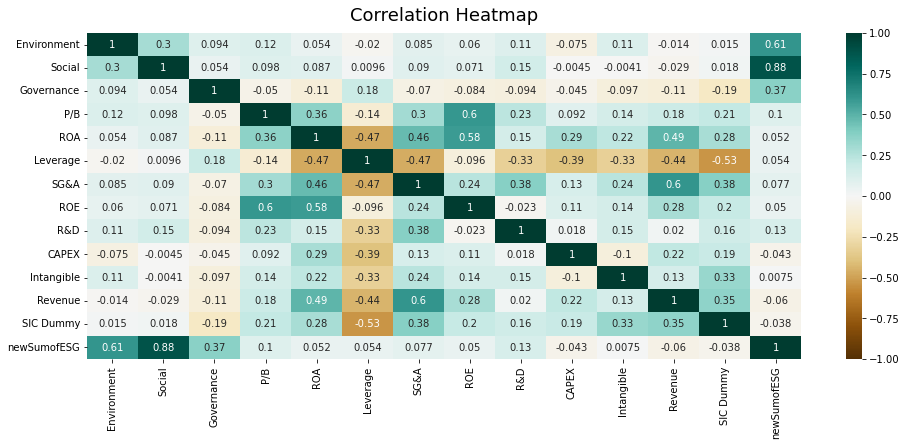

In [21]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_win_new.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [22]:
df_win_new.corr().head(12)

,Environment,Social,Governance,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue,SIC Dummy,newSumofESG
Environment,1.000000,0.295225,0.093875,0.115793,0.053999,-0.019902,0.084635,0.059656,0.105923,-0.075240,0.111436,-0.014188,0.015039,0.606407
Social,0.295225,1.000000,0.054255,0.097601,0.086594,0.009629,0.089580,0.071083,0.153903,-0.004519,-0.004077,-0.028611,0.018353,0.884308
Governance,0.093875,0.054255,1.000000,-0.049537,-0.113426,0.180337,-0.070118,-0.084401,-0.093731,-0.044971,-0.096811,-0.110918,-0.194294,0.371571
P/B,0.115793,0.097601,-0.049537,1.000000,0.360762,-0.137388,0.297278,0.597136,0.233797,0.092294,0.143933,0.178700,0.207789,0.100726
ROA,0.053999,0.086594,-0.113426,0.360762,1.000000,-0.468994,0.464887,0.579606,0.146336,0.285371,0.219236,0.486807,0.282725,0.051532
Leverage,-0.019902,0.009629,0.180337,-0.137388,-0.468994,1.000000,-0.465400,-0.096055,-0.325150,-0.391939,-0.325177,-0.442022,-0.532659,0.053889
SG&A,0.084635,0.089580,-0.070118,0.297278,0.464887,-0.465400,1.000000,0.238277,0.377362,0.130691,0.237960,0.601665,0.380670,0.077489
ROE,0.059656,0.071083,-0.084401,0.597136,0.579606,-0.096055,0.238277,1.000000,-0.023036,0.114500,0.141149,0.283543,0.199804,0.050298
R&D,0.105923,0.153903,-0.093731,0.233797,0.146336,-0.325150,0.377362,-0.023036,1.000000,0.017774,0.145121,0.019786,0.158821,0.127132
CAPEX,-0.075240,-0.004519,-0.044971,0.092294,0.285371,-0.391939,0.130691,0.114500,0.017774,1.000000,-0.100489,0.218258,0.194458,-0.043367


In [ ]:
df.describe(include='object')

In [ ]:
df['cusip'].value_counts().to_frame()